In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255


In [4]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [7]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7001 - loss: 1.1044 - val_accuracy: 0.9157 - val_loss: 0.2687
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9122 - loss: 0.2848 - val_accuracy: 0.9062 - val_loss: 0.3016
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9424 - loss: 0.1824 - val_accuracy: 0.9536 - val_loss: 0.1609
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9610 - loss: 0.1238 - val_accuracy: 0.9486 - val_loss: 0.1752
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9711 - loss: 0.0903 - val_accuracy: 0.9575 - val_loss: 0.1438
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9787 - loss: 0.0673 - val_accuracy: 0.9533 - val_loss: 0.1577
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9842 - loss: 0.0505 - val_accuracy: 0.9629 - val_loss: 0.1302
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9889 - loss: 0.0339 - val_accu

In [8]:
model = get_model()
history_zeros =model.fit(
    train_images_with_zero_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8608 - loss: 0.4819 - val_accuracy: 0.9567 - val_loss: 0.1525
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9615 - loss: 0.1335 - val_accuracy: 0.9668 - val_loss: 0.1127
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9756 - loss: 0.0830 - val_accuracy: 0.9739 - val_loss: 0.0891
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9837 - loss: 0.0579 - val_accuracy: 0.9747 - val_loss: 0.0867
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9876 - loss: 0.0425 - val_accuracy: 0.9754 - val_loss: 0.0816
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9915 - loss: 0.0302 - val_accuracy: 0.9769 - val_loss: 0.0763
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9927 - loss: 0.0250 - val_accuracy: 0.9779 - val_loss: 0.0785
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9954 - loss: 0.0175 - val_accu

In [9]:
import matplotlib.pyplot as plt


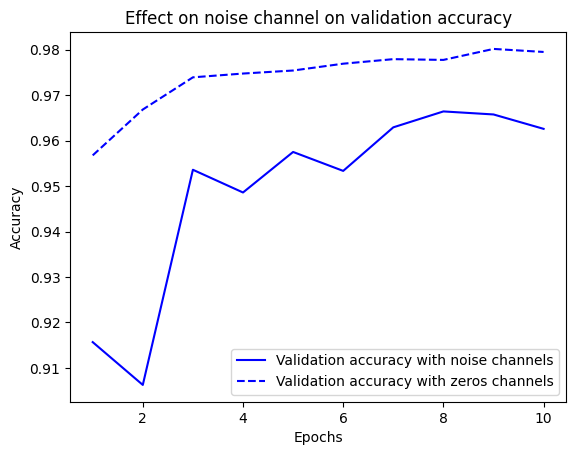

In [11]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs= range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect on noise channel on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255


In [13]:
randon_train_labels = train_labels[:]
np.random.shuffle(randon_train_labels)

In [14]:
model = get_model()
model.fit(train_images, randon_train_labels, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1025 - loss: 2.3317 - val_accuracy: 0.1012 - val_loss: 2.3053
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1180 - loss: 2.2972 - val_accuracy: 0.1006 - val_loss: 2.3145
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1332 - loss: 2.2883 - val_accuracy: 0.1050 - val_loss: 2.3180
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1392 - loss: 2.2751 - val_accuracy: 0.1026 - val_loss: 2.3381
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1534 - loss: 2.2601 - val_accuracy: 0.1047 - val_loss: 2.3379
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1664 - loss: 2.2401 - val_accuracy: 0.0986 - val_loss: 2.3478
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1859 - loss: 2.2173 - val_accuracy: 0.1006 - val_loss: 2.3656
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1985 - loss: 2.1895 - val_accu

In [15]:
# num_validation_samples = 10000
# np.random.shuffle(data)
# validation_data = data[:num_validation_samples]
# training_data = data[num_validation_samples:]


In [17]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4669 - loss: 3602.9058 - val_accuracy: 0.2002 - val_loss: 2.1384
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1989 - loss: 3.2909 - val_accuracy: 0.1684 - val_loss: 2.3656
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1910 - loss: 2.5624 - val_accuracy: 0.2668 - val_loss: 2.3418
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2232 - loss: 2.8485 - val_accuracy: 0.2977 - val_loss: 3.1729
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2359 - loss: 2.5804 - val_accuracy: 0.2496 - val_loss: 2.1088
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2301 - loss: 2.8051 - val_accuracy: 0.2521 - val_loss: 2.2351
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2290 - loss: 2.3701 - val_accuracy: 0.2125 - val_loss: 2.1763
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2168 - loss: 2.3184 - val_accuracy:

In [18]:
model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8310 - loss: 0.9242 - val_accuracy: 0.9578 - val_loss: 0.1409
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9634 - loss: 0.1296 - val_accuracy: 0.9688 - val_loss: 0.1178
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9739 - loss: 0.0910 - val_accuracy: 0.9684 - val_loss: 0.1542
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9794 - loss: 0.0763 - val_accuracy: 0.9699 - val_loss: 0.1547
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9832 - loss: 0.0639 - val_accuracy: 0.9697 - val_loss: 0.1808
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9855 - loss: 0.0566 - val_accuracy: 0.9663 - val_loss: 0.1984
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9893 - loss: 0.0423 - val_accuracy: 0.9744 - val_loss: 0.1562
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9893 - loss: 0.0424 - val_accuracy: 0.

In [19]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 1.0422 - val_accuracy: 0.9029 - val_loss: 0.3602
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.3739 - val_accuracy: 0.9161 - val_loss: 0.3098
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9109 - loss: 0.3160 - val_accuracy: 0.9178 - val_loss: 0.2942
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.3112 - val_accuracy: 0.9205 - val_loss: 0.2843
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.2875 - val_accuracy: 0.9225 - val_loss: 0.2784
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2929 - val_accuracy: 0.9218 - val_loss: 0.2774
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.2893 - val_accuracy: 0.9260 - val_loss: 0.2717
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9229 - loss: 0.2738 - val_accuracy: 0.

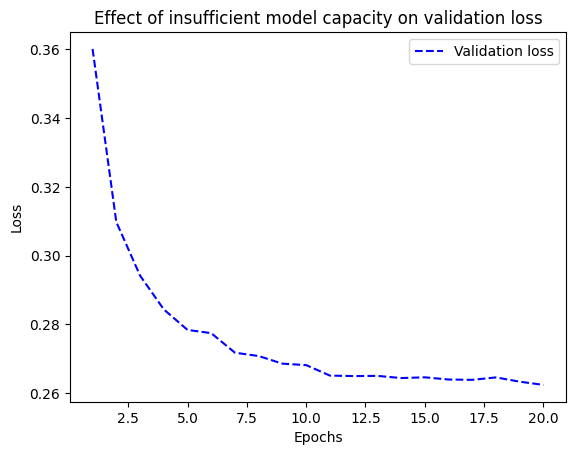

In [20]:
val_loss = history_small_model.history["val_loss"]
epochs= range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8317 - loss: 0.6081 - val_accuracy: 0.9485 - val_loss: 0.1816
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1722 - val_accuracy: 0.9602 - val_loss: 0.1333
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1184 - val_accuracy: 0.9668 - val_loss: 0.1117
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0864 - val_accuracy: 0.9722 - val_loss: 0.0958
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0658 - val_accuracy: 0.9663 - val_loss: 0.1105
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0549 - val_accuracy: 0.9720 - val_loss: 0.0969
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9734 - val_loss: 0.0903
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0362 - val_accuracy: 0.

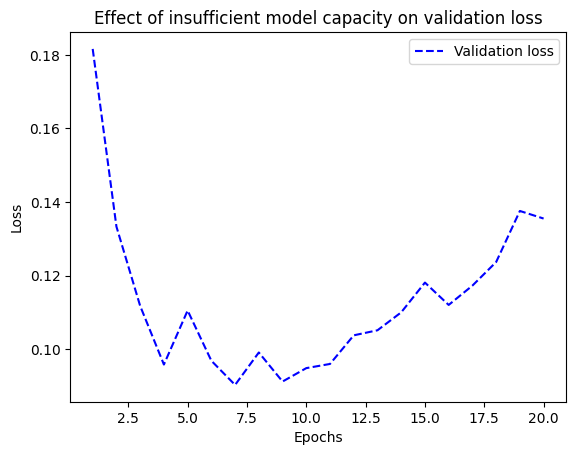

In [22]:
val_loss = history_large_model.history["val_loss"]
epochs= range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [23]:
from tensorflow.keras.datasets import imdb

In [24]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)


In [25]:
def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [26]:
train_data = vectorize_sequences(train_data)

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6929 - loss: 0.6003 - val_accuracy: 0.8699 - val_loss: 0.3735
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8900 - loss: 0.3251 - val_accuracy: 0.8865 - val_loss: 0.3023
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9276 - loss: 0.2275 - val_accuracy: 0.8931 - val_loss: 0.2768
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9428 - loss: 0.1854 - val_accuracy: 0.8897 - val_loss: 0.2736
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9536 - loss: 0.1500 - val_accuracy: 0.8807 - val_loss: 0.2990
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9595 - loss: 0.1334 - val_accuracy: 0.8856 - val_loss: 0.2872
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9627 - loss: 0.1169 - val_accuracy: 0.8820 - val_loss: 0.3025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9728 - loss: 0.0982 - val_accuracy: 0.8765 - v

In [29]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6482 - loss: 0.6653 - val_accuracy: 0.8042 - val_loss: 0.5871
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8346 - loss: 0.5553 - val_accuracy: 0.8456 - val_loss: 0.5077
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8800 - loss: 0.4712 - val_accuracy: 0.8655 - val_loss: 0.4408
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8984 - loss: 0.3951 - val_accuracy: 0.8784 - val_loss: 0.3876
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9126 - loss: 0.3356 - val_accuracy: 0.8832 - val_loss: 0.3477
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9238 - loss: 0.2861 - val_accuracy: 0.8864 - val_loss: 0.3179
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9271 - loss: 0.2551 - val_accuracy: 0.8855 - val_loss: 0.2993
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9342 - loss: 0.2252 - val_accuracy: 0.8901 - 

In [30]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6458 - loss: 0.6450 - val_accuracy: 0.8638 - val_loss: 0.3536
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8669 - loss: 0.3307 - val_accuracy: 0.8861 - val_loss: 0.2808
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9051 - loss: 0.2425 - val_accuracy: 0.8634 - val_loss: 0.3293
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9250 - loss: 0.1889 - val_accuracy: 0.8561 - val_loss: 0.3481
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9490 - loss: 0.1345 - val_accuracy: 0.8741 - val_loss: 0.3204
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9691 - loss: 0.0949 - val_accuracy: 0.8760 - val_loss: 0.3123
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9867 - loss: 0.0581 - val_accuracy: 0.8841 - val_loss: 0.2953
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9969 - loss: 0.0299 - val_accuracy: 0.

In [31]:
from tensorflow.keras import regularizers

In [32]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_l2_req = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6661 - loss: 0.7062 - val_accuracy: 0.8654 - val_loss: 0.4939
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8881 - loss: 0.4443 - val_accuracy: 0.8817 - val_loss: 0.4011
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9083 - loss: 0.3527 - val_accuracy: 0.8747 - val_loss: 0.3897
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9273 - loss: 0.3052 - val_accuracy: 0.8825 - val_loss: 0.3695
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9333 - loss: 0.2779 - val_accuracy: 0.8863 - val_loss: 0.3557
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9375 - loss: 0.2663 - val_accuracy: 0.8711 - val_loss: 0.3891
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9428 - loss: 0.2536 - val_accuracy: 0.8842 - val_loss: 0.3621
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9512 - loss: 0.2355 - val_accuracy: 0.8823 - v

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history__dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5652 - loss: 0.6682 - val_accuracy: 0.8423 - val_loss: 0.5328
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7484 - loss: 0.5423 - val_accuracy: 0.8724 - val_loss: 0.4217
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8208 - loss: 0.4469 - val_accuracy: 0.8762 - val_loss: 0.3468
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8539 - loss: 0.3816 - val_accuracy: 0.8700 - val_loss: 0.3272
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8803 - loss: 0.3252 - val_accuracy: 0.8902 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8997 - loss: 0.2925 - val_accuracy: 0.8745 - val_loss: 0.3041
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9124 - loss: 0.2568 - val_accuracy: 0.8764 - val_loss: 0.3020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9246 - loss: 0.2303 - val_accuracy: 0.8905 - v